## Test on small data.
Test if the ANN works well on small tractable data set.

In this I check if I could train my implement ANN to perform linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import gd

In [2]:
# ann.activation = ann_utils.sigmoid
# ann.d_activation = ann_utils.d_sigmoid
# ann.output_activation = ann_utils.softmax
# ann.d_output_activation = ann_utils.d_softmax
ann.activation = ann_utils.identity
ann.d_activation = ann_utils.d_identity
ann.output_activation = ann_utils.identity
ann.d_output_activation = ann_utils.d_identity
ann.weight_init = ann_utils.xavier_init
ann.loss = 'mean_squared_error'

ann.num_layers = 1
ann.hidden_size = 1
ann.learning_rate = 0.1

nn = ann(2,1)

In [3]:
print(nn.Ws)
print(nn.bs)
# nn.Ws[0][0][0] = 1
# nn.Ws[1][0][0] = 1
# nn.bs[0][0][0] = 0
# nn.bs[1][0][0] = 0
# print(nn.Ws)
# print(nn.bs)

[array([[-1.00597592,  0.52231776]]), array([[0.30396719]])]
[array([[0.89564596]]), array([[-1.84093133]])]


In [4]:
## Data
x0 = np.array([0])
x1 = np.array([1])
y0 = x0[0]
y1 = x1[0]

# X_train = np.array([x0, x1])
# y_train = np.array([y0, y1])

x0 = np.linspace(0, 1, 1000)
np.random.shuffle(x0)
x1 = np.linspace(0, 1, 1000)
np.random.shuffle(x1)
X_train = np.array([np.array([x0[i], x1[i]]) for i in range(1000)])
y_train = X_train[:, 0] + X_train[:, 1]
y_train.shape
X_train[0].flatten().shape

(2,)

In [5]:
gd.sgd(nn, X_train, y_train)

1.2472472472472473


In [6]:
print('W: ', nn.Ws)
print('b: ', nn.bs)
print('a: ', nn.a)
print('al: ', nn.al)
print('h: ', nn.h)
print('y: ', nn.y)
print(nn.grad_bs)
print(nn.grad_Ws)

W:  [array([[-0.92050561,  0.55235289]]), array([[0.34558695]])]
b:  [array([[0.98825425]]), array([[-1.53626591]])]
a:  [array([[0.13660808]])]
al:  [[-1.79940695]]
h:  [array([[0.13660808]])]
y:  [[-1.79940695]]
[array([[-0.92608291]]), array([[-3.0466542]])]
[array([[-0.85470315, -0.30035121]]), array([[-0.41619758]])]


In [18]:
for i in range(100):
    gd.sgd(nn, X_train, y_train)

0.7007007007007007
0.8618618618618619
1.1411411411411412
1.2952952952952952
1.4304304304304303
0.5775775775775776
0.8738738738738739
1.2402402402402402
1.2212212212212212
1.3133133133133132
0.5735735735735735
1.109109109109109
0.7017017017017017
0.4654654654654654
0.3873873873873874
0.8918918918918919
0.7907907907907907
0.6646646646646647
0.5715715715715716
0.9589589589589589
1.199199199199199
1.6196196196196195
1.1961961961961962
0.9429429429429429
1.0970970970970972
0.42342342342342343
1.2202202202202201
1.2632632632632632
0.7557557557557557
0.8598598598598599
1.4614614614614614
1.930930930930931
1.17017017017017
0.9179179179179179
0.8038038038038038
0.8038038038038038
0.8528528528528528
1.3073073073073074
1.8788788788788788
0.4804804804804805
1.5515515515515514
0.12812812812812813
1.177177177177177
1.4614614614614614
0.8578578578578578
1.2332332332332332
0.8618618618618619
0.40540540540540543
1.159159159159159
1.1631631631631631
0.9469469469469469
0.4824824824824825
0.95595595595595

(1000,)
(1000,)


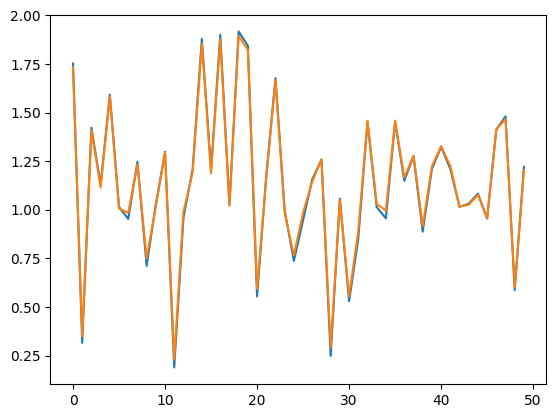

In [19]:
y_pred = []
for i in range(len(y_train)):
    nn.forward_prop(X_train[i])
    y_pred.append(nn.y[0][0])

y_pred = np.array(y_pred)

print(y_pred.shape)
print(y_train.shape)
i = 0
window = 50
plt.plot(y_train[i: i + window])
plt.plot(y_pred[i: i + window])

In [9]:
print(nn.Ws)
print(nn.bs)
print(nn.a)
print(nn.al)
print(nn.h)
print(nn.y)

[array([[0.10955097, 0.88485433]]), array([[1.00062967]])]
[array([[1.40053685]]), array([[-0.72860652]])]
[array([[2.13357528]])]
[[1.40631221]]
[array([[2.13357528]])]
[[1.40631221]]
